**Machine Learning AoL : Heart Disease Prediction**


---

2502003775	: Erin Kumala Aliwarga\
2501985451	: Jason Adriel\
2501987091	: Moethia Shakira


---

Dataset Used : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# 1. Library and Data Loading

In [ ]:
#Package installs
!pip install matplotx
!pip install dython
!pip install scikit-learn-intelex
!wget https://raw.githubusercontent.com/intll/collegework/main/Roboto.zip -O Roboto.zip
!unzip -o Roboto.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-06-23 23:36:18--  https://raw.githubusercontent.com/intll/collegework/main/Roboto.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2056418 (2.0M) [application/zip]
Saving to: ‘Roboto.zip’

Roboto.zip          100%[===================>]   1.96M  --.-KB/s    in 0.05s   

2023-06-23 23:36:18 (39.9 MB/s) - ‘Roboto.zip’ saved [2056418/2056418]

Archive:  Roboto.zip
 extracting: Roboto-Thin.ttf         
 extracting: Roboto-ThinItalic.ttf   
 extracting: Roboto-Li

In [ ]:
#Library Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import matplotx

from sklearnex import patch_sklearn #Used for faster sklearn
patch_sklearn()

plt.style.use(matplotx.styles.pitaya_smoothie["dark"])
plt.rc('figure', autolayout = True)
plt.rc('axes', labelweight = 'bold', labelsize = 'large',
       titleweight = 'bold', titlesize = 14, titlepad = 12)
plt.rcParams['figure.dpi'] = 140

fm.fontManager.addfont('Roboto-Bold.ttf')
fm.fontManager.addfont('Roboto-Regular.ttf')
fm.fontManager.addfont('Roboto-Italic.ttf')
plt.rcParams["font.family"] = "Roboto"

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/intll/collegework/main/data.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# 2. Exploratory Data Analysis

### 2.1 Data Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### 2.2 Distribution of the Target Variable

Text(0, 0.5, 'Count')

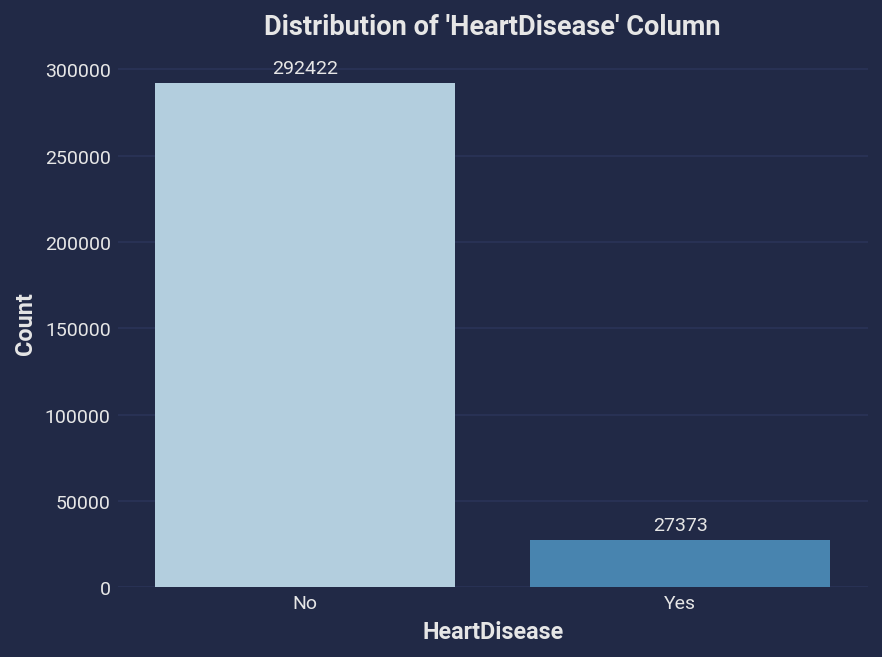

In [ ]:
ax = sns.countplot(data = df, x = "HeartDisease", palette = "Blues")
ax.bar_label(ax.containers[0], padding = 3)
plt.title("Distribution of 'HeartDisease' Column")
plt.ylabel("Count")

### 2.3 Correlation Matrix

Text(0.5, 1.0, 'Numerical Variables Correlation Heatmap')

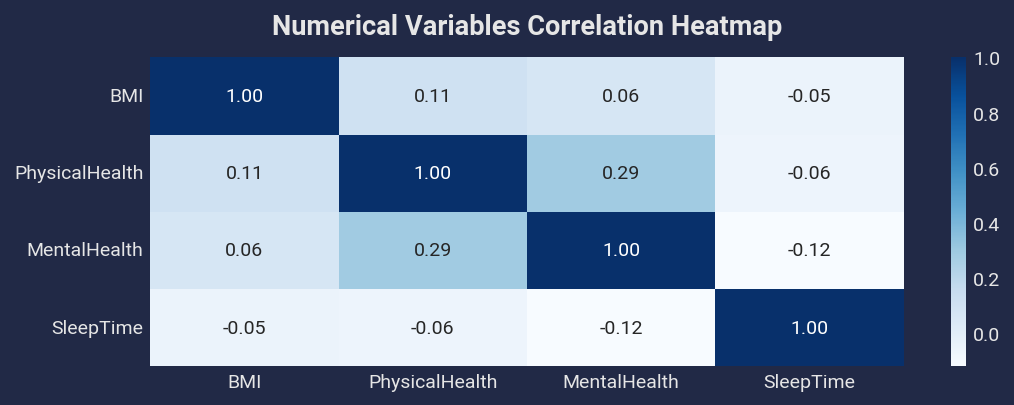

In [ ]:
#Numerical Correlation using Pearson
corr_num = df.corr(numeric_only = True)
plt.figure(figsize = (8, 3))
sns.heatmap(corr_num, annot = True, fmt = ".2f", cmap = sns.color_palette("Blues", as_cmap=True))
plt.title("Numerical Variables Correlation Heatmap")

Text(0.5, 1.0, 'Categorical Variables Correlation Heatmap')

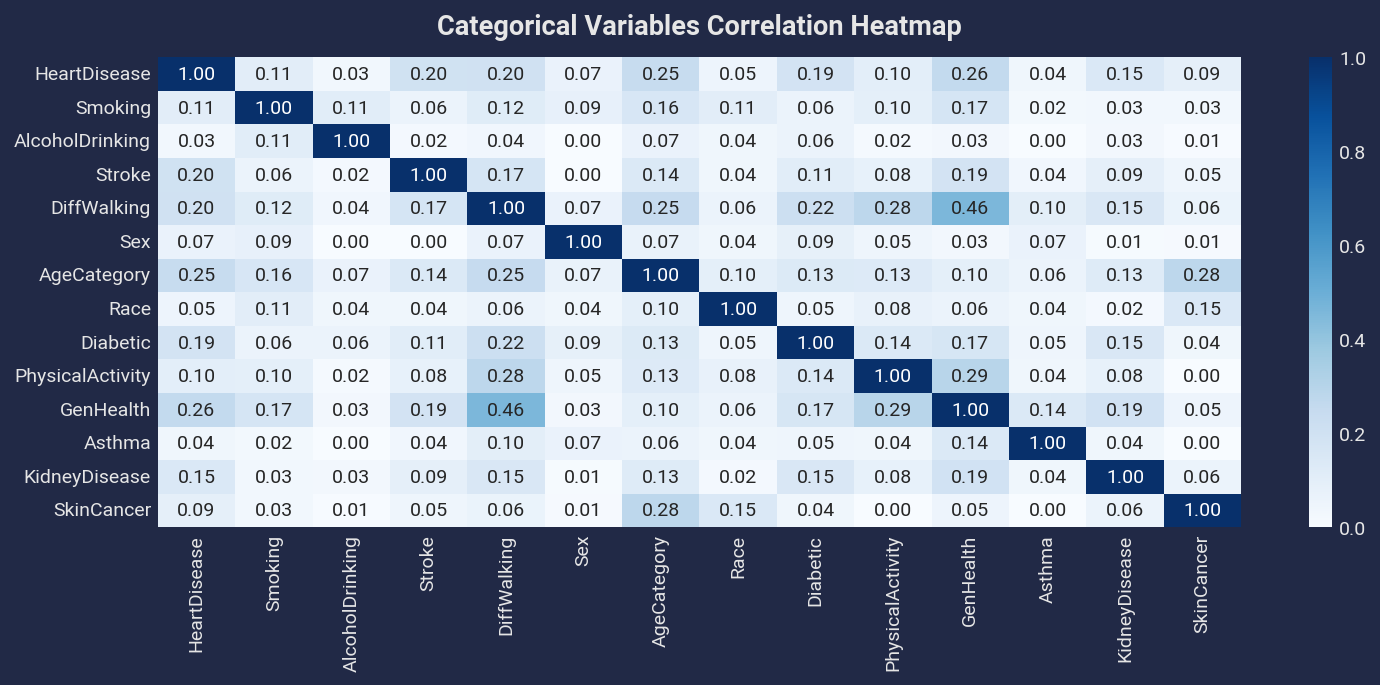

In [ ]:
#Categorical Correlation using Cramer's V
from dython.nominal import associations
corr_cat = associations(df.select_dtypes(include = [object]), compute_only = True)["corr"]
plt.figure(figsize = (11, 5))
sns.heatmap(corr_cat, annot = True, fmt = '.2f', cmap = sns.color_palette("Blues", as_cmap=True))
plt.title("Categorical Variables Correlation Heatmap")

Text(0.5, 1.0, 'Target Variable Correlation Heatmap')

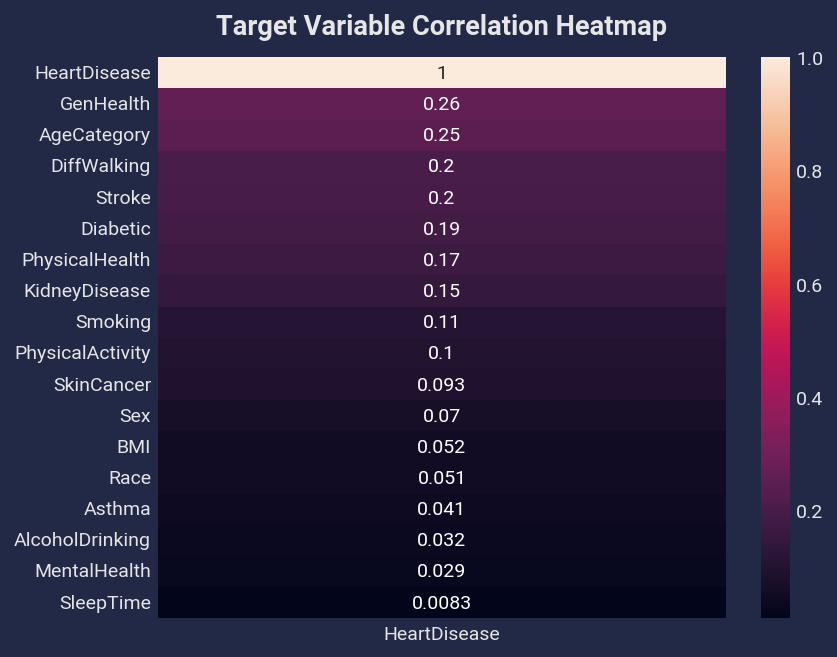

In [ ]:
#Correlation of the Target Variable
corr_all = associations(df, compute_only = True)["corr"]["HeartDisease"]
corr_all = pd.DataFrame(corr_all).sort_values(by = "HeartDisease", ascending = False)
sns.heatmap(corr_all, annot = True)
plt.title("Target Variable Correlation Heatmap")

# 3. Data Preprocessing

### 3.1 Handling Missing Values and Duplicated Rows

In [ ]:
#Testing for Missing Values
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
#Testing for Duplicated Data
df.duplicated().sum()

18078

In [ ]:
#Removing Duplicates
df_clean = df.copy()
df_clean = df_clean.drop_duplicates()
df_clean.duplicated().sum()

0

### 3.2 One-Hot-Encoding

In [ ]:
categorical_columns = df_clean.select_dtypes(include = [object]).columns[1:]
df_encoded = pd.get_dummies(df_clean, columns = categorical_columns) #Exclude the target variable as well
df_encoded = df_encoded.replace({'HeartDisease': {'Yes': True, 'No': False}}) #Encode the target variable to boolean
df_encoded = df_encoded.reset_index()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 52 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   index                                301717 non-null  int64  
 1   HeartDisease                         301717 non-null  bool   
 2   BMI                                  301717 non-null  float64
 3   PhysicalHealth                       301717 non-null  float64
 4   MentalHealth                         301717 non-null  float64
 5   SleepTime                            301717 non-null  float64
 6   Smoking_No                           301717 non-null  uint8  
 7   Smoking_Yes                          301717 non-null  uint8  
 8   AlcoholDrinking_No                   301717 non-null  uint8  
 9   AlcoholDrinking_Yes                  301717 non-null  uint8  
 10  Stroke_No                            301717 non-null  uint8  
 11  Stroke_Yes   

### 3.3 PCA

In [ ]:
#There are tons of columns, let's create a PCA and compare the results later on
#Standardizing the data first:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standardized = scaler.fit_transform(df_encoded.iloc[:, 2:]) #Makes sure that there are no target leakage
x_standardized

array([[-1.83082001, -0.07030131,  3.1837661 , ..., -0.20153203,
        -3.04964275,  3.04964275],
       [-1.25259976, -0.43882257, -0.50705407, ..., -0.20153203,
         0.32790726, -0.32790726],
       [-0.28786867,  2.01798582,  3.1837661 , ..., -0.20153203,
         0.32790726, -0.32790726],
       ...,
       [-0.64964283, -0.43882257, -0.50705407, ..., -0.20153203,
         0.32790726, -0.32790726],
       [ 0.67531639, -0.43882257, -0.50705407, ..., -0.20153203,
         0.32790726, -0.32790726],
       [ 2.8011261 , -0.43882257, -0.50705407, ..., -0.20153203,
         0.32790726, -0.32790726]])

In [ ]:
#PCA Decomposition
from sklearn.decomposition import PCA
decomposer1 = PCA()
df_pca1 = decomposer1.fit_transform(x_standardized)

Total Explained Variance (%): [100.]%


Text(0.5, 1.0, 'PCA Variance Ratio with n = 51')

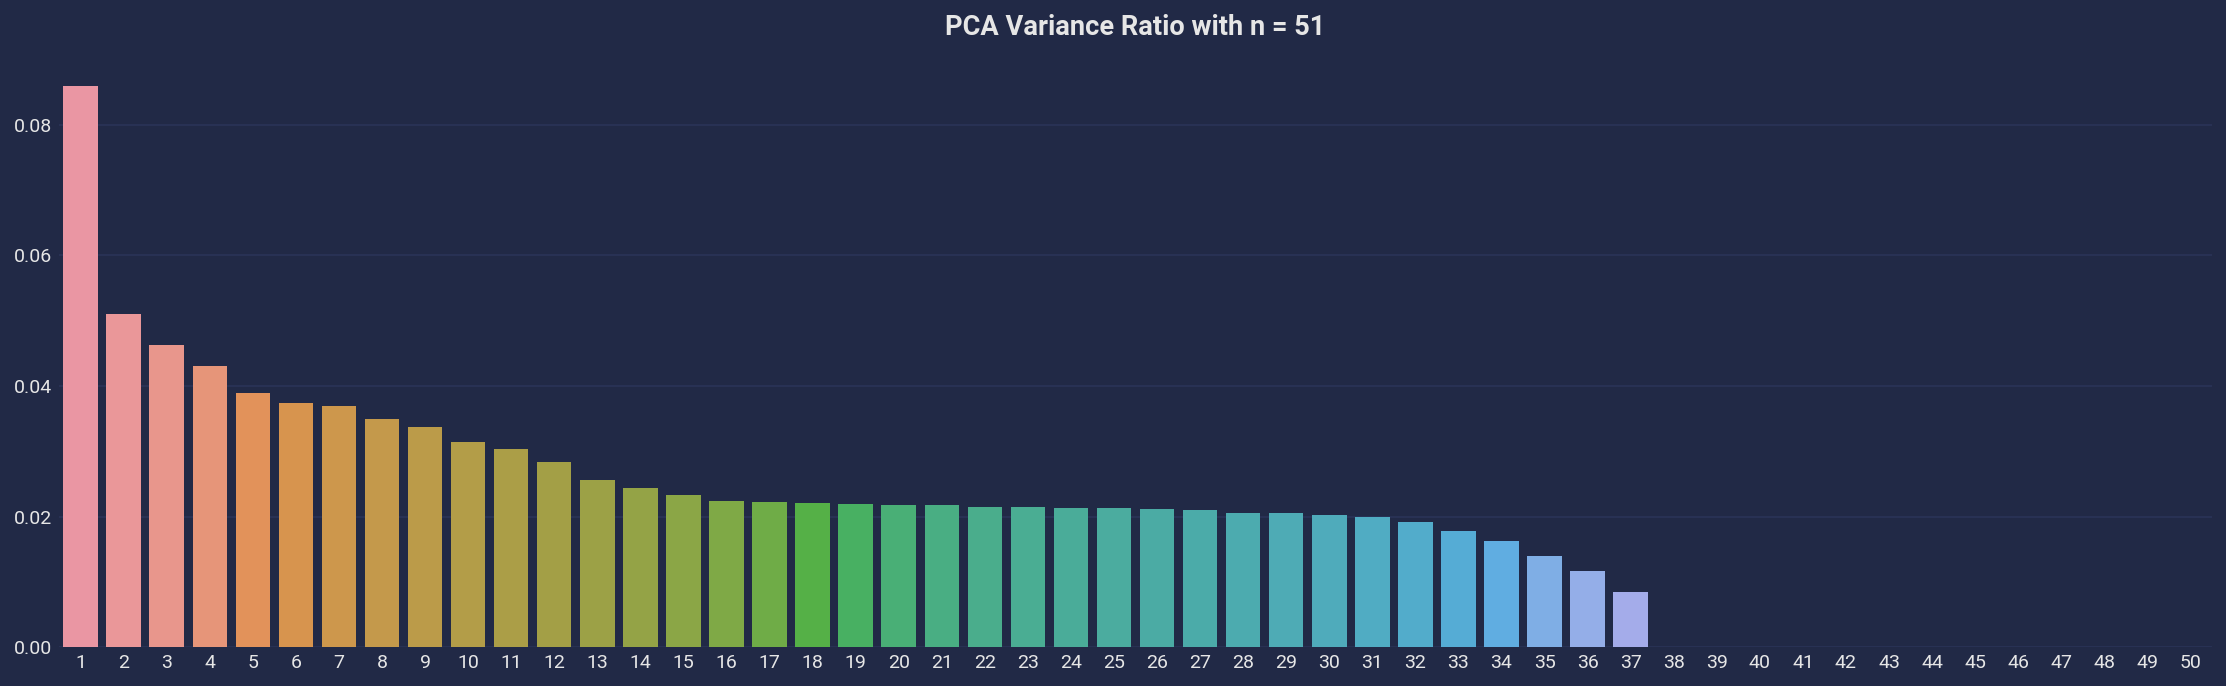

In [ ]:
var = decomposer1.explained_variance_ratio_
print(f"Total Explained Variance (%): {decomposer1.explained_variance_ratio_.cumsum()[-1:] * 100}%")
plt.figure(figsize = (16, 5))
sns.barplot(x = list(range(1, len(var)+1)), y = var)
plt.title("PCA Variance Ratio with n = 51")

In [ ]:
#There is little to no variance explained (<2%) with >31 components let's use n=31
decomposer2 = PCA(n_components = 31)
df_pca2 = decomposer2.fit_transform(x_standardized)

Total Explained Variance (%): [91.27042354]%


Text(0.5, 1.0, 'PCA Variance Ratio with n = 31')

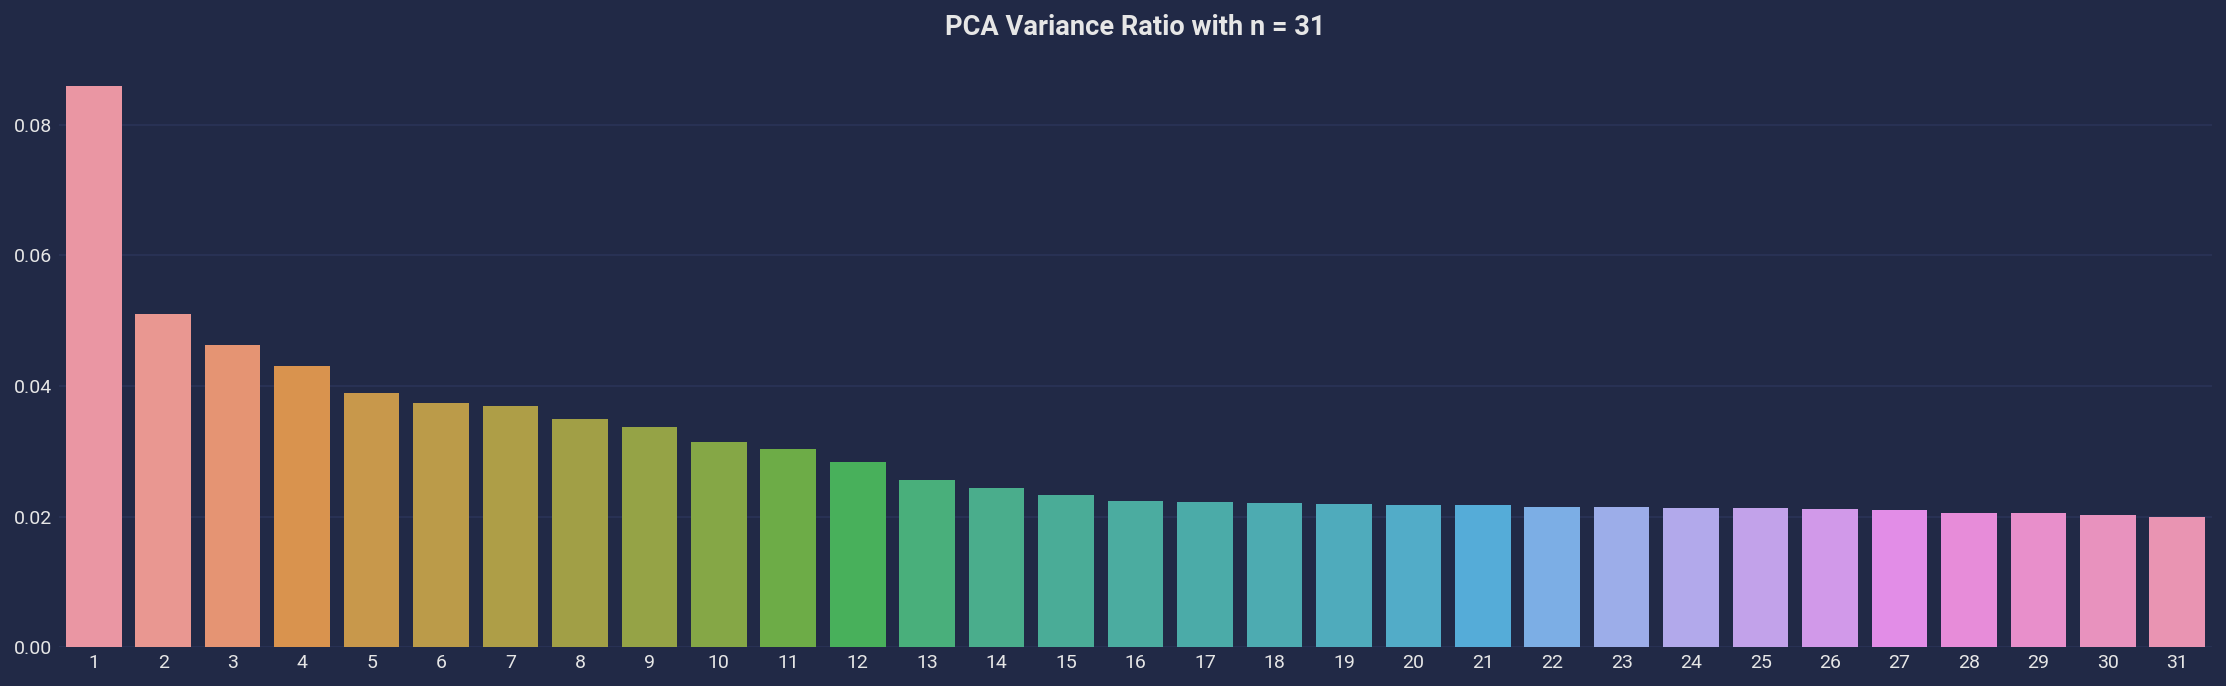

In [ ]:
#91% of the variance is explained with only 31 features, much better!
var = decomposer2.explained_variance_ratio_
print(f"Total Explained Variance (%): {decomposer2.explained_variance_ratio_.cumsum()[-1:] * 100}%")
plt.figure(figsize = (16, 5))
sns.barplot(x = list(range(1, len(var)+1)), y = var)
plt.title("PCA Variance Ratio with n = 31")

In [ ]:
#Merging the data and finalizing the PCA
df_pca = pd.concat([pd.DataFrame(df_pca2), df_encoded[['HeartDisease']]], axis = 1)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,HeartDisease
0,1.690796,1.952633,-0.544860,3.188576,2.867956,-2.542747,-0.156596,-2.005353,0.715823,0.765957,...,-0.189764,-0.559557,-0.640775,-0.057219,-0.026545,-0.414493,-1.771706,-0.445083,-0.575123,False
1,0.382978,1.292316,-2.342357,1.107981,0.012520,6.154913,-2.878233,-1.707525,-0.586800,0.026121,...,0.028086,-0.694511,-0.696894,0.015709,0.285258,0.146778,-0.829122,-0.144386,0.342522,False
2,2.793722,-0.300691,1.539606,0.032578,3.745476,-1.991604,-0.375668,-1.416579,-0.195444,-1.396866,...,-0.593747,-0.634659,-0.568350,-0.015442,-0.870495,-0.223903,-1.516398,-0.026485,0.564848,False
3,0.623736,2.314034,-2.455416,1.511546,-2.192528,-1.530623,-0.450142,0.619606,2.007693,2.433417,...,-0.323861,1.124011,1.121652,-0.003316,-1.476898,-0.000780,0.557626,0.375088,0.001641,False
4,1.082305,-0.639829,-0.787513,1.568072,-1.227079,0.404992,-0.415054,0.855415,-0.961633,-2.358732,...,3.493943,1.254101,-0.215395,-0.079360,-0.368675,-0.198828,0.575053,0.401106,-0.251203,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,5.085831,-2.440637,1.678673,-1.354420,1.633535,-2.339515,-0.873758,-0.083612,1.686430,0.160152,...,-0.185586,-0.428542,-0.093512,0.223619,1.492265,-0.480796,-0.024683,-0.326563,-1.932276,True
301713,-0.891192,-1.602596,1.886678,-0.114558,3.373950,-0.980864,-1.054841,0.498800,-0.057425,1.781339,...,-1.569177,2.722290,-0.159041,-0.052209,2.289715,-0.475084,0.457624,-1.125739,-1.037476,False
301714,-1.479409,-2.226242,-0.884268,-0.176206,-0.739593,0.429371,0.434606,-0.378410,0.604549,1.769823,...,-0.646860,-1.205662,-1.141758,0.040170,1.399269,-0.508765,0.354408,-0.648865,-1.226368,False
301715,-0.362898,-2.697355,-0.844962,-0.488464,-2.270741,-0.045234,0.149325,0.611324,1.451120,2.408693,...,0.133460,-0.418374,0.621563,3.999671,2.099329,0.699806,-0.134691,-0.671061,0.364933,False


# 4. Data Modelling

### 4.1 PCA Comparison

#### 4.1.1 Without PCA

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_encoded.drop("HeartDisease", axis = 1),
                                                    df_encoded["HeartDisease"],
                                                    test_size = 0.3,
                                                    random_state = 49)

In [ ]:
#Train baseline model: Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

              precision    recall  f1-score   support

       False       0.91      1.00      0.95     82323
        True       0.00      0.00      0.00      8193

    accuracy                           0.91     90516
   macro avg       0.45      0.50      0.48     90516
weighted avg       0.83      0.91      0.87     90516



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'ROC Curve of Logistic Regression [No PCA]')

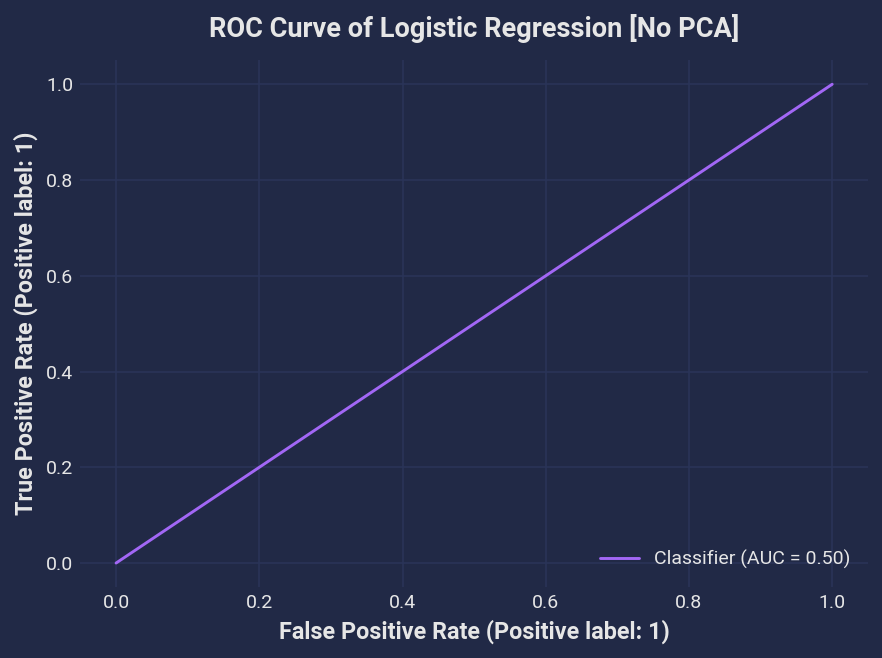

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
lr_report = classification_report(y_test, lr_pred)
print(lr_report)
RocCurveDisplay.from_predictions(y_test, lr_pred)
plt.title("ROC Curve of Logistic Regression [No PCA]")

In [ ]:
#Train baseline model: Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_jobs = -1)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

              precision    recall  f1-score   support

       False       0.92      0.99      0.95     82323
        True       0.46      0.10      0.17      8193

    accuracy                           0.91     90516
   macro avg       0.69      0.55      0.56     90516
weighted avg       0.88      0.91      0.88     90516



Text(0.5, 1.0, 'ROC Curve of Random Forest [No PCA]')

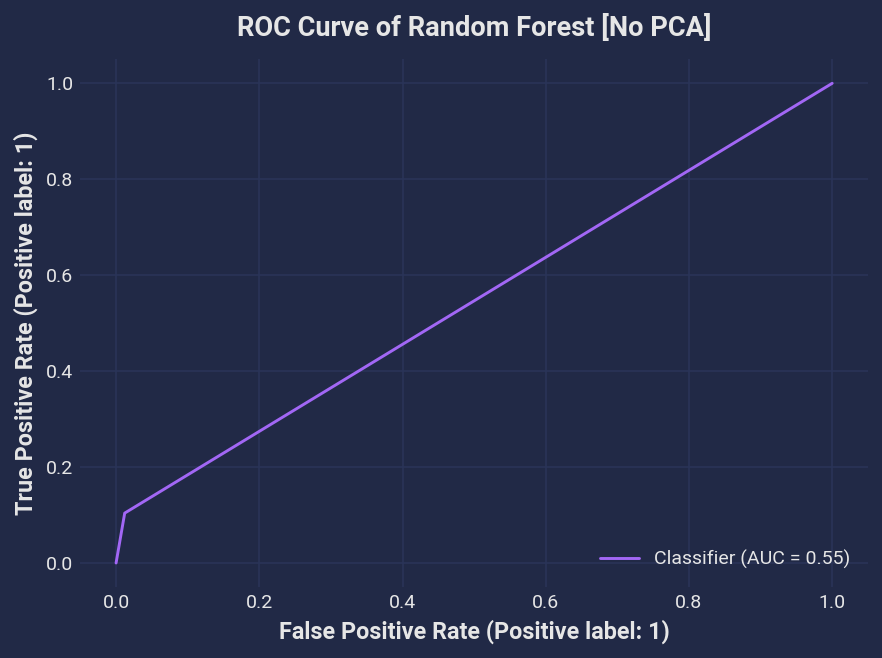

In [ ]:
rf_report = classification_report(y_test, rf_pred)
print(rf_report)
RocCurveDisplay.from_predictions(y_test, rf_pred)
plt.title("ROC Curve of Random Forest [No PCA]")

In [ ]:
#Train AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(x_train, y_train)
ada_pred = ada_model.predict(x_test)

              precision    recall  f1-score   support

       False       0.92      0.99      0.95     82323
        True       0.54      0.12      0.20      8193

    accuracy                           0.91     90516
   macro avg       0.73      0.55      0.57     90516
weighted avg       0.88      0.91      0.88     90516



Text(0.5, 1.0, 'ROC Curve of AdaBoost [No PCA]')

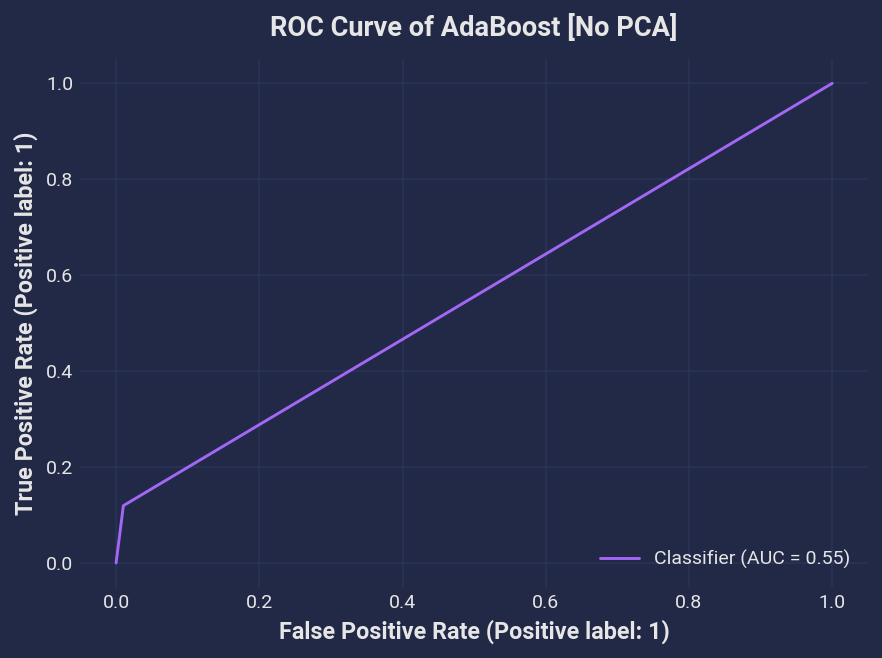

In [ ]:
ada_report = classification_report(y_test, ada_pred)
print(ada_report)
RocCurveDisplay.from_predictions(y_test, ada_pred)
plt.title("ROC Curve of AdaBoost [No PCA]")

#### 4.1.2 With PCA

In [ ]:
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca.drop("HeartDisease", axis = 1),
                                                    df_pca["HeartDisease"],
                                                    test_size = 0.3,
                                                    random_state = 49)

In [ ]:
#Train baseline model: Logistic Regression
lr_model_pca = LogisticRegression()
lr_model_pca.fit(x_train_pca, y_train_pca)
lr_pred_pca = lr_model_pca.predict(x_test_pca)

              precision    recall  f1-score   support

       False       0.92      0.99      0.95     82323
        True       0.53      0.10      0.17      8193

    accuracy                           0.91     90516
   macro avg       0.72      0.54      0.56     90516
weighted avg       0.88      0.91      0.88     90516



Text(0.5, 1.0, 'ROC Curve of Logistic Regression [PCA]')

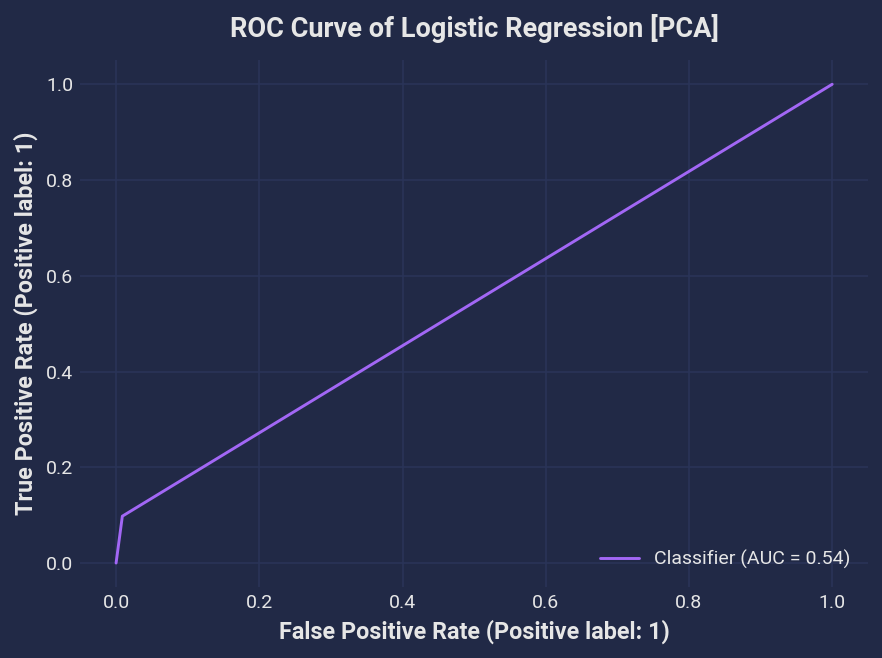

In [ ]:
lr_report_pca = classification_report(y_test_pca, lr_pred_pca)
print(lr_report_pca)
RocCurveDisplay.from_predictions(y_test_pca, lr_pred_pca)
plt.title("ROC Curve of Logistic Regression [PCA]")

In [ ]:
#Train baseline model: Random Forest
rf_model_pca = RandomForestClassifier(n_jobs = -1)
rf_model_pca.fit(x_train_pca, y_train_pca)
rf_pred_pca = rf_model_pca.predict(x_test_pca)

              precision    recall  f1-score   support

       False       0.92      0.98      0.95     82323
        True       0.35      0.13      0.19      8193

    accuracy                           0.90     90516
   macro avg       0.64      0.55      0.57     90516
weighted avg       0.87      0.90      0.88     90516



Text(0.5, 1.0, 'ROC Curve of Random Forest [PCA]')

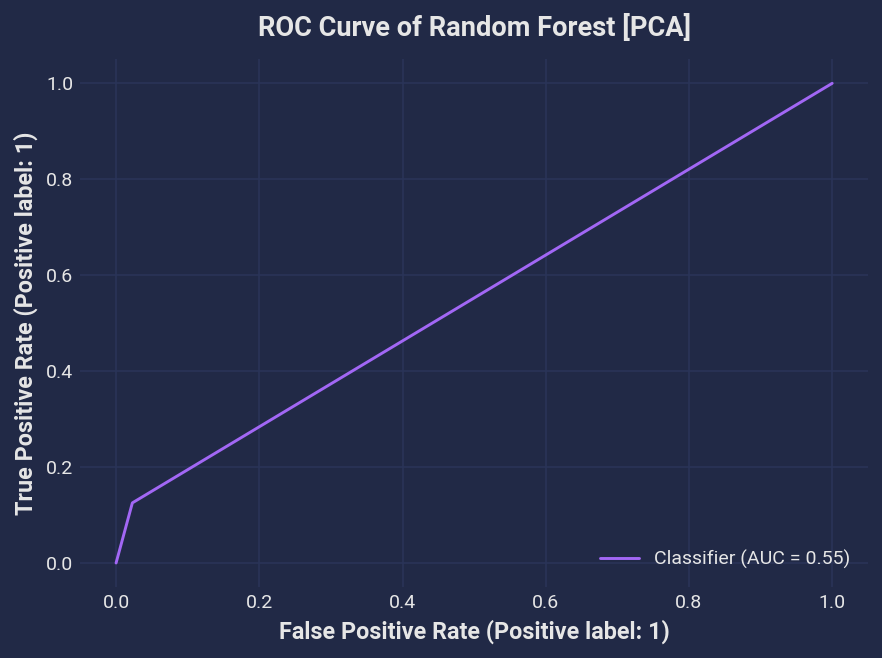

In [ ]:
rf_report_pca = classification_report(y_test_pca, rf_pred_pca)
print(rf_report_pca)
RocCurveDisplay.from_predictions(y_test_pca, rf_pred_pca)
plt.title("ROC Curve of Random Forest [PCA]")

In [ ]:
#Train AdaBoost
ada_model_pca = AdaBoostClassifier()
ada_model_pca.fit(x_train_pca, y_train_pca)
ada_pred_pca = ada_model_pca.predict(x_test_pca)

              precision    recall  f1-score   support

       False       0.92      0.99      0.95     82323
        True       0.52      0.10      0.16      8193

    accuracy                           0.91     90516
   macro avg       0.72      0.54      0.56     90516
weighted avg       0.88      0.91      0.88     90516



Text(0.5, 1.0, 'ROC Curve of AdaBoost [PCA]')

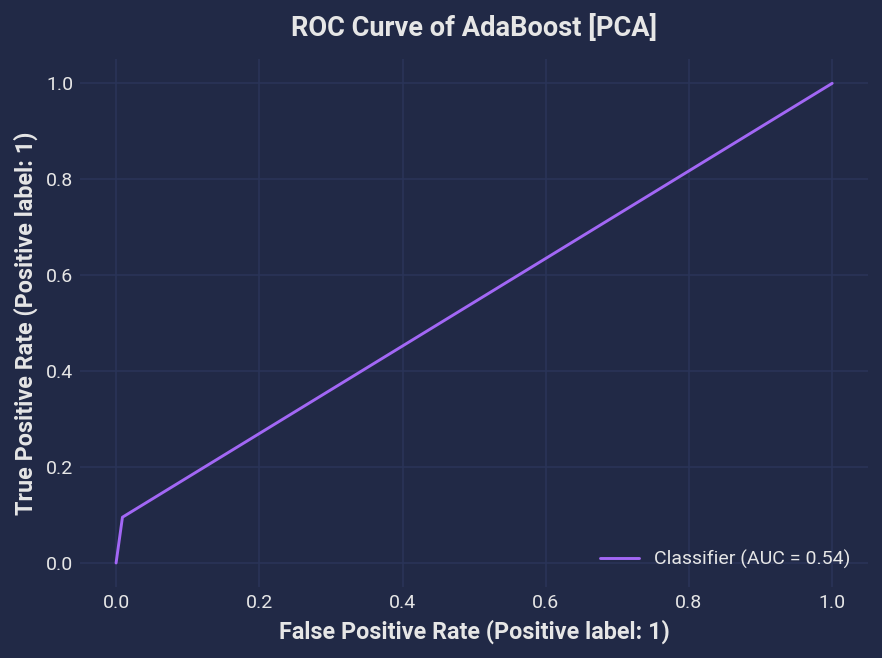

In [ ]:
ada_report_pca = classification_report(y_test_pca, ada_pred_pca)
print(ada_report_pca)
RocCurveDisplay.from_predictions(y_test_pca, ada_pred_pca)
plt.title("ROC Curve of AdaBoost [PCA]")


#### 4.1.3 Comparison PCA vs Non-PCA

PCA AUC: 0.55 (LR), 0.55 (RF), 0.54 (AdaBoost)\
No-PCA AUC: 0.50 (LR), 0.55 (RF), 0.55 (AdaBoost)\
PCA slightly increases the overall AUC of the models except AdaBoost. RandomForest sees no change, but increased the F1 Score of the Positive class by 0.02. Therefore, PCA should be applied to RandomForest and Logistic Regression, but not AdaBoost.

### 4.2 Undersampling and Oversampling

#### 4.2.1 Random Undersampling

In [ ]:
#Undersample using imblearn's random sampler
from imblearn.under_sampling import RandomUnderSampler
sampler_rus = RandomUnderSampler(random_state = 49)
x_train_pca_randomunder, y_train_pca_randomunder = sampler_rus.fit_resample(x_train_pca, y_train_pca)

In [ ]:
#Train baseline model: Logistic Regression
lr_model_pca_randomunder = LogisticRegression()
lr_model_pca_randomunder.fit(x_train_pca_randomunder, y_train_pca_randomunder)
lr_pred_pca_randomunder = lr_model_pca_randomunder.predict(x_test_pca)

              precision    recall  f1-score   support

       False       0.96      0.77      0.85     82323
        True       0.23      0.70      0.35      8193

    accuracy                           0.76     90516
   macro avg       0.60      0.73      0.60     90516
weighted avg       0.90      0.76      0.81     90516



Text(0.5, 1.0, 'ROC Curve of Logistic Regression [PCA, RandomUnder]')

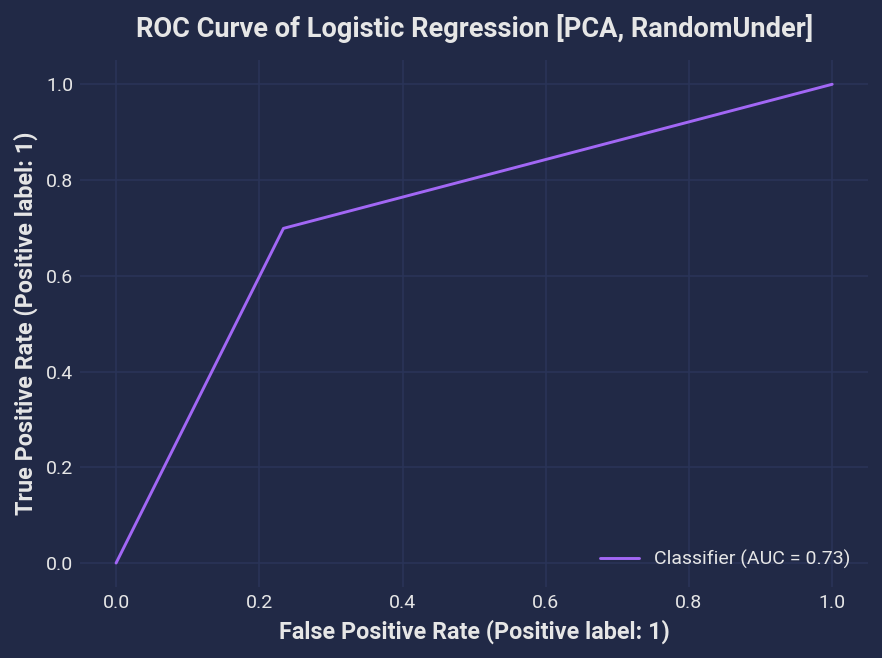

In [ ]:
lr_report_pca_randomunder = classification_report(y_test_pca, lr_pred_pca_randomunder)
print(lr_report_pca_randomunder)
RocCurveDisplay.from_predictions(y_test_pca, lr_pred_pca_randomunder)
plt.title("ROC Curve of Logistic Regression [PCA, RandomUnder]")

In [ ]:
#Train baseline model: Random Forest
rf_model_pca_randomunder = RandomForestClassifier(n_jobs = -1)
rf_model_pca_randomunder.fit(x_train_pca_randomunder, y_train_pca_randomunder)
rf_pred_pca_randomunder = rf_model_pca_randomunder.predict(x_test_pca)

              precision    recall  f1-score   support

       False       0.97      0.71      0.82     82323
        True       0.20      0.75      0.32      8193

    accuracy                           0.71     90516
   macro avg       0.58      0.73      0.57     90516
weighted avg       0.90      0.71      0.77     90516



Text(0.5, 1.0, 'ROC Curve of Random Forest [PCA, RandomUnder]')

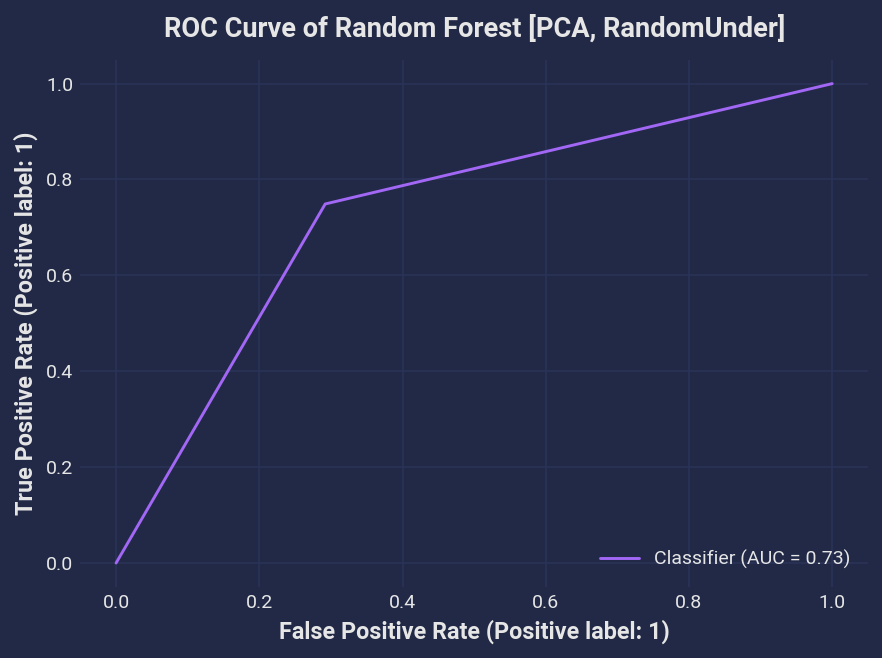

In [ ]:
rf_report_pca_randomunder = classification_report(y_test_pca, rf_pred_pca_randomunder)
print(rf_report_pca_randomunder)
RocCurveDisplay.from_predictions(y_test_pca, rf_pred_pca_randomunder)
plt.title("ROC Curve of Random Forest [PCA, RandomUnder]")

In [ ]:
#Train AdaBoost
x_train_randomunder, y_train_randomunder = sampler_rus.fit_resample(x_train, y_train) #Do Not Use PCA on AdaBoost

ada_model_randomunder = AdaBoostClassifier()
ada_model_randomunder.fit(x_train_randomunder, y_train_randomunder)
ada_pred_randomunder = ada_model_randomunder.predict(x_test)

              precision    recall  f1-score   support

       False       0.97      0.74      0.84     82323
        True       0.23      0.77      0.35      8193

    accuracy                           0.75     90516
   macro avg       0.60      0.76      0.60     90516
weighted avg       0.90      0.75      0.80     90516



Text(0.5, 1.0, 'ROC Curve of AdaBoost [RandomUnder]')

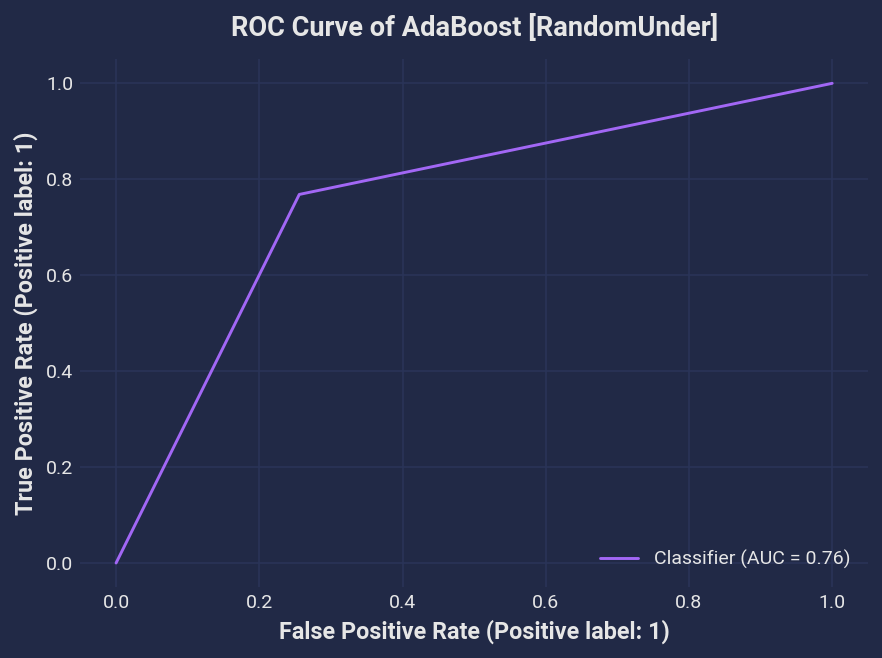

In [ ]:
ada_report_randomunder = classification_report(y_test, ada_pred_randomunder)
print(ada_report_randomunder)
RocCurveDisplay.from_predictions(y_test, ada_pred_randomunder)
plt.title("ROC Curve of AdaBoost [RandomUnder]")

#### 4.2.2 SMOTE Oversampling


In [ ]:
#Oversample using imblearn's SMOTE
from imblearn.over_sampling import SMOTE
sampler_smote = SMOTE(random_state = 49, n_jobs = -1)
x_train_pca_smote, y_train_pca_smote = sampler_smote.fit_resample(x_train_pca, y_train_pca)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
#Train baseline model: Logistic Regression
lr_model_pca_smote = LogisticRegression()
lr_model_pca_smote.fit(x_train_pca_smote, y_train_pca_smote)
lr_pred_pca_smote = lr_model_pca_smote.predict(x_test_pca)

              precision    recall  f1-score   support

       False       0.96      0.76      0.85     82323
        True       0.23      0.70      0.35      8193

    accuracy                           0.76     90516
   macro avg       0.60      0.73      0.60     90516
weighted avg       0.90      0.76      0.81     90516



Text(0.5, 1.0, 'ROC Curve of Logistic Regression [PCA, SMOTE]')

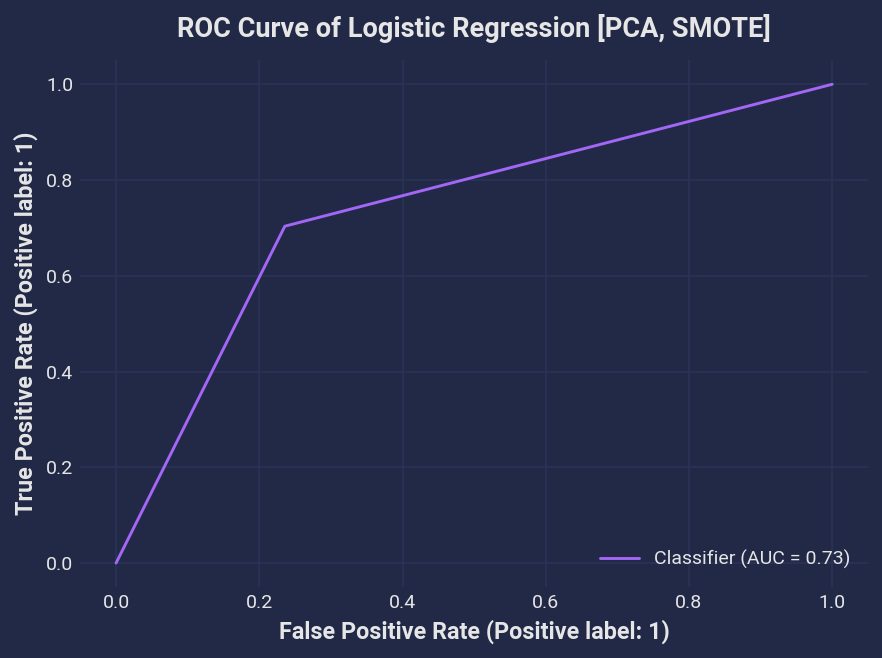

In [ ]:
lr_report_pca_smote = classification_report(y_test_pca, lr_pred_pca_smote)
print(lr_report_pca_smote)
RocCurveDisplay.from_predictions(y_test_pca, lr_pred_pca_smote)
plt.title("ROC Curve of Logistic Regression [PCA, SMOTE]")

In [ ]:
#Train baseline model: Random Forest
rf_model_pca_smote = RandomForestClassifier(n_jobs = -1)
rf_model_pca_smote.fit(x_train_pca_smote, y_train_pca_smote)
rf_pred_pca_smote = rf_model_pca_smote.predict(x_test_pca)

              precision    recall  f1-score   support

       False       0.94      0.88      0.91     82323
        True       0.25      0.42      0.32      8193

    accuracy                           0.84     90516
   macro avg       0.60      0.65      0.61     90516
weighted avg       0.88      0.84      0.85     90516



Text(0.5, 1.0, 'ROC Curve of Random Forest [PCA, SMOTE]')

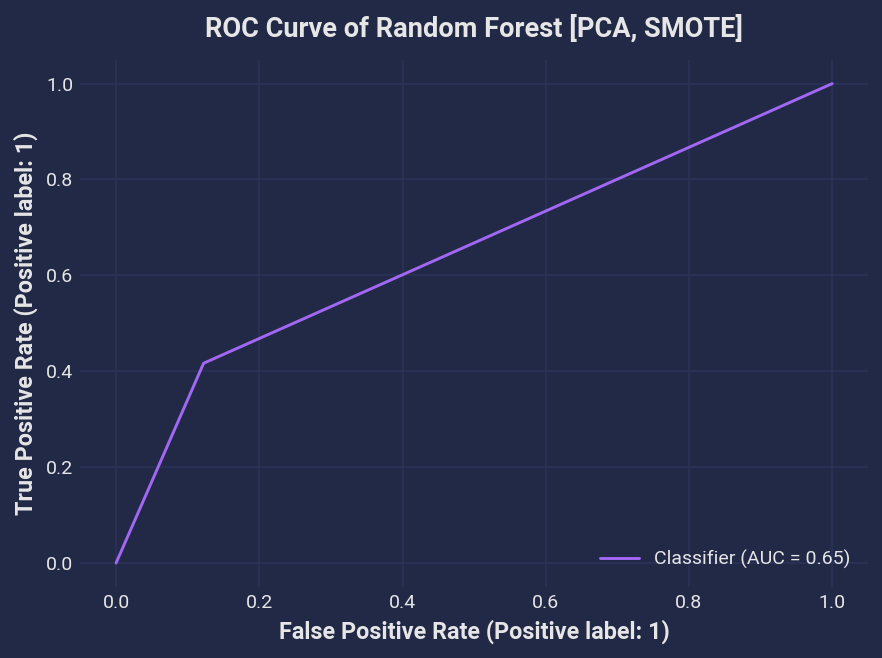

In [ ]:
rf_report_pca_smote = classification_report(y_test_pca, rf_pred_pca_smote)
print(rf_report_pca_smote)
RocCurveDisplay.from_predictions(y_test_pca, rf_pred_pca_smote)
plt.title("ROC Curve of Random Forest [PCA, SMOTE]")

In [ ]:
#Train AdaBoost
ada_model_smote = AdaBoostClassifier()
ada_model_smote.fit(x_train, y_train)
ada_pred_smote = ada_model_smote.predict(x_test)

              precision    recall  f1-score   support

       False       0.92      0.99      0.95     82323
        True       0.54      0.12      0.20      8193

    accuracy                           0.91     90516
   macro avg       0.73      0.55      0.57     90516
weighted avg       0.88      0.91      0.88     90516



Text(0.5, 1.0, 'ROC Curve of AdaBoost [SMOTE]')

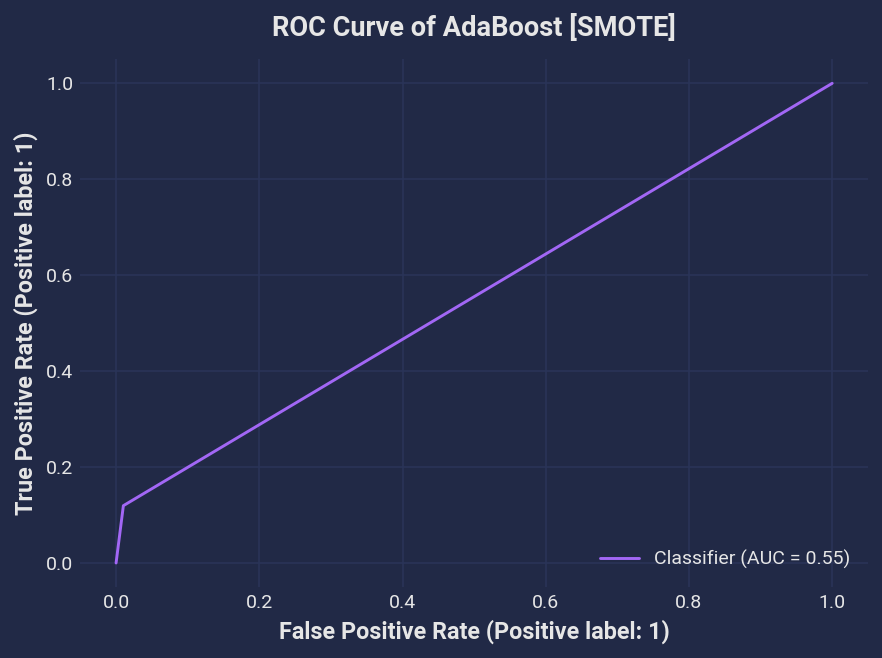

In [ ]:
ada_report_smote = classification_report(y_test, ada_pred_smote)
print(ada_report_smote)
RocCurveDisplay.from_predictions(y_test, ada_pred_smote)
plt.title("ROC Curve of AdaBoost [SMOTE]")

#### 4.2.3 Sampler Comparison

Random Undersampling AUC: 0.73 (LR), 0.73 (RF), and 0.76 (AdaBoost) \
SMOTE AUC: 0.73 (LR), 0.65 (RF), 0.75 (AdaBoost)\
Random Undersampling produces better result.

### 4.3 Hyperparameter Tuning

#### 4.3.1 Tuning Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
tune_rf = {
    'class_weight' : [None, 'balanced', {1:0.9, 0:0.1}, {1:0.8, 0:0.2}],
    'n_estimators' : [50, 100, 200]
}

rf_tuned = GridSearchCV(rf_model_pca_randomunder, tune_rf, n_jobs = -1, scoring='f1_macro', refit = True)
rf_tuned.fit(x_train_pca, y_train_pca)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced', {0: 0.1, 1: 0.9},
                                          {0: 0.2, 1: 0.8}],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro')

{'class_weight': {1: 0.8, 0: 0.2}, 'n_estimators': 200}
              precision    recall  f1-score   support

       False       0.94      0.87      0.90     82323
        True       0.27      0.48      0.34      8193

    accuracy                           0.83     90516
   macro avg       0.60      0.67      0.62     90516
weighted avg       0.88      0.83      0.85     90516



Text(0.5, 1.0, 'ROC Curve of Random Forest [PCA, RandomUnder, Tuned]')

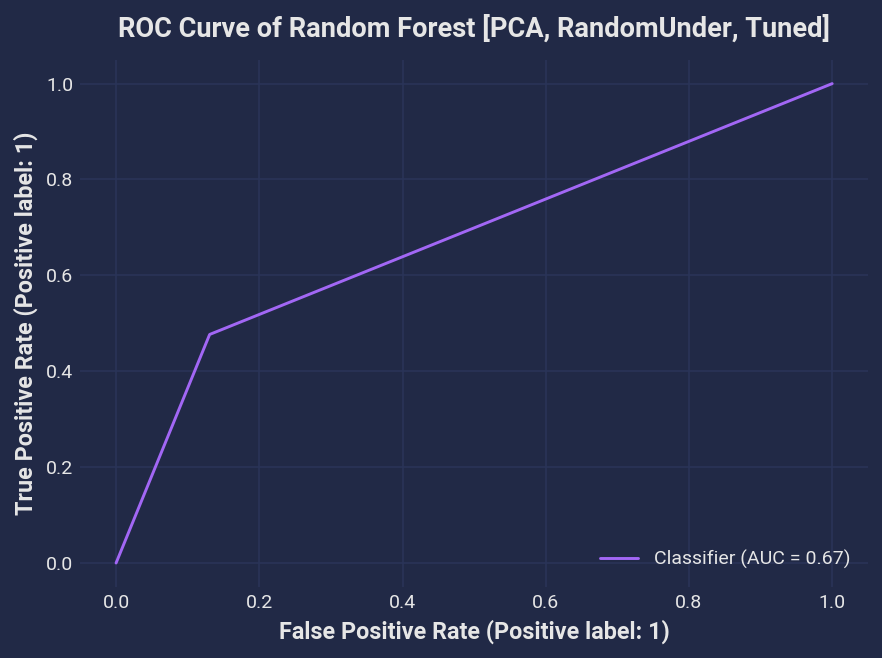

In [ ]:
print(rf_tuned.best_params_)
rf_tuned_pred = rf_tuned.predict(x_test_pca)
rf_tuned_report = classification_report(y_test_pca, rf_tuned_pred)
print(rf_tuned_report)
RocCurveDisplay.from_predictions(y_test_pca, rf_tuned_pred)
plt.title("ROC Curve of Random Forest [PCA, RandomUnder, Tuned]")

#### 4.3.2 Tuning AdaBoost

In [ ]:
tune_ada = {
    'learning_rate' : [0.2, 0.5, 1],
    'n_estimators' : [50, 100, 150]
}

ada_tuned = GridSearchCV(ada_model_randomunder, tune_ada, n_jobs = -1, scoring='f1_macro', refit = True)
ada_tuned.fit(x_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.5, 1],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_macro')

{'learning_rate': 1, 'n_estimators': 150}
              precision    recall  f1-score   support

       False       0.92      0.99      0.95     82323
        True       0.54      0.12      0.19      8193

    accuracy                           0.91     90516
   macro avg       0.73      0.55      0.57     90516
weighted avg       0.88      0.91      0.88     90516



Text(0.5, 1.0, 'ROC Curve of AdaBoost [RandomUnder, Tuned]')

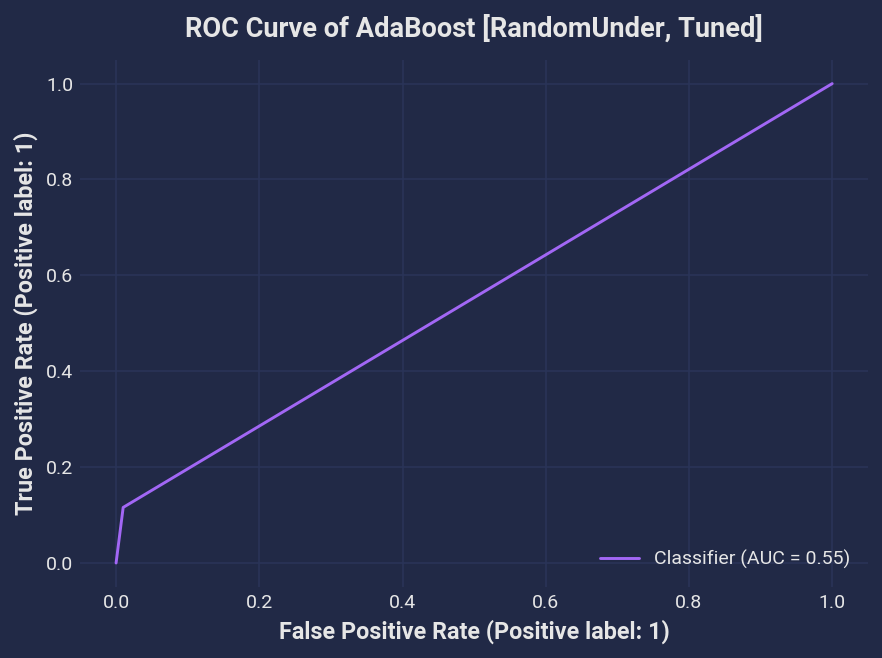

In [ ]:
print(ada_tuned.best_params_)
ada_tuned_pred = ada_tuned.predict(x_test)
ada_tuned_report = classification_report(y_test, ada_tuned_pred)
print(ada_tuned_report)
RocCurveDisplay.from_predictions(y_test, ada_tuned_pred)
plt.title("ROC Curve of AdaBoost [RandomUnder, Tuned]")

#### 4.3.3 Tuning Logistic Regression

In [ ]:
tune_lr = {
    'C' : [0.01, 0.1, 1],
    'penalty' : ['l1', 'l2'],
    'solver' : ['saga']
}
lr_tuned = GridSearchCV(lr_model_pca_randomunder, tune_lr, n_jobs = -1, scoring='f1_macro', refit = True)
lr_tuned.fit(x_train_pca, y_train_pca)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='f1_macro')

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

       False       0.92      0.99      0.95     82323
        True       0.53      0.10      0.17      8193

    accuracy                           0.91     90516
   macro avg       0.72      0.54      0.56     90516
weighted avg       0.88      0.91      0.88     90516



Text(0.5, 1.0, 'ROC Curve of Logistic Regression [PCA, RandomUnder, Tuned]')

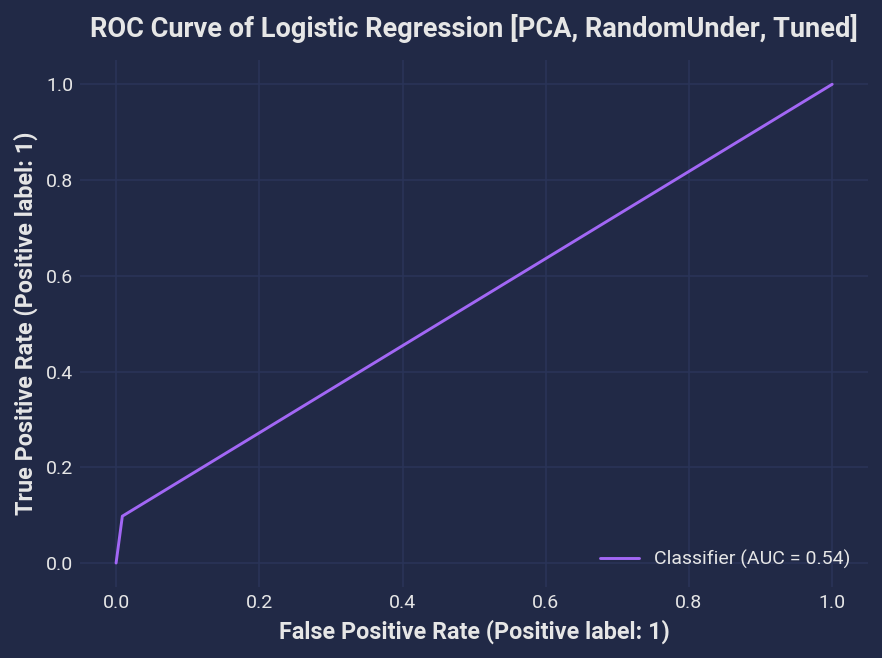

In [ ]:
print(lr_tuned.best_params_)
lr_tuned_pred = lr_tuned.predict(x_test_pca)
lr_tuned_report = classification_report(y_test, lr_tuned_pred)
print(lr_tuned_report)
RocCurveDisplay.from_predictions(y_test_pca, lr_tuned_pred)
plt.title("ROC Curve of Logistic Regression [PCA, RandomUnder, Tuned]")

## Conclusion

In [ ]:
from sklearn.metrics import roc_auc_score as auc
best_auc = {"LR Tuned + PCA + RUS" : auc(y_test_pca, lr_tuned_pred),
            "RF Tuned + PCA + RUS" : auc(y_test_pca, rf_tuned_pred),
            "AdaBoost Tuned + RUS" : auc(y_test, ada_tuned_pred),
            "LR PCA + RUS" : auc(y_test_pca, lr_pred_pca_randomunder),
            "RF PCA + RUS" : auc(y_test_pca, rf_pred_pca_randomunder),
            "AdaBoost + RUS" : auc(y_test, ada_pred_randomunder),
            "LR" : auc(y_test, lr_pred),
            "RF" : auc(y_test, rf_pred),
            "AdaBoost" : auc(y_test, ada_pred)
}
best_auc = dict(sorted(best_auc.items(), key=lambda x:x[1], reverse = True))
best_auc

{'AdaBoost + RUS': 0.7562586224903731,
 'LR PCA + RUS': 0.7326428304423023,
 'RF PCA + RUS': 0.728449705926339,
 'RF Tuned + PCA + RUS': 0.673040111137901,
 'AdaBoost': 0.5546564171255065,
 'AdaBoost Tuned + RUS': 0.5530202336437107,
 'RF': 0.5459766319638499,
 'LR Tuned + PCA + RUS': 0.5445651285634117,
 'LR': 0.5}

Text(0.5, 1.0, 'AUC Score Comparison between Models')

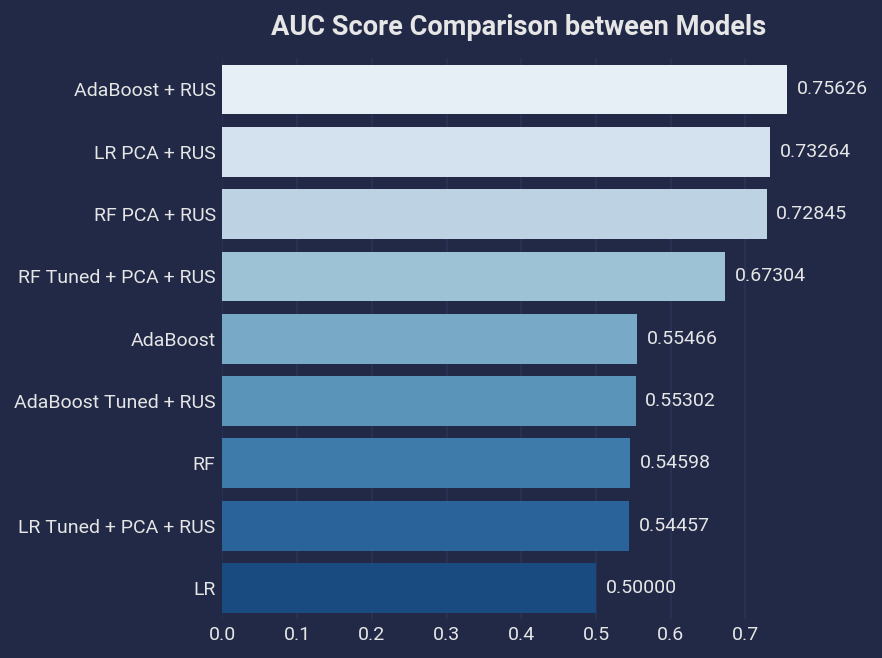

In [ ]:
ax = sns.barplot(y = list(best_auc.keys()), x = list(best_auc.values()), palette = "Blues")
ax.bar_label(ax.containers[0], fmt='%.5f', padding = 5)
plt.title("AUC Score Comparison between Models")